Need to find an area covered by roughly 4 undithered FOVs for a full PhoSim simulation.

Want the area to have pixels with mean/typical depth= median survey depth. and not so scattered abs(max-min)depth.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import time
import pandas as pd
import lsst.sims.maf.metricBundles as metricBundles
repoDir= os.getcwd()
os.chdir(os.path.join(repoDir , '..' ))
from findDC1Regions import findDC1Regions

In [2]:
help(findDC1Regions)

Help on function findDC1Regions in module findDC1Regions:

findDC1Regions(coaddBundle, dbpath, plotTestPlots=True, filterBand='i', depthDiffThreshold=0.005, rangeThreshold=0.5, nside=256, returnAll=False)
    Find candidate regions for DC1 (based on how wildly the average depth in the region 
    differs from the survey median depth).
    
    Returns a bunch of stuff ...
    
    Required Parameters
    -------------------
      * coaddBundle: dict: dictionary with keys= observing strategy names, pointing to corresponding
                           to a metricBundle object.
           NOTE: coaddBundle should have always have NoDither. If want to find regions based on a dithered
                 survey, the bundle should have the dithered data ALONG WITH the undithered one.
      * dbpath: str: path to the OpSim database.
    
    Optional Parameters
    -------------------
      * plotTestPlots: bool: set to False if dont want to plot things for debugging/testing code.
              

### Based on RandomDitherFieldPerVisit coadded depth.

In [3]:
path= '/Volumes/Transcend/'
path2= '2017-01-11/coaddM5Analysis_nside256_withDustExtinction_14pixelRadiusForMasking_rBand_minion1016_fullSurveyPeriod_directory/'
path3= 'maskedCoaddData/'
os.chdir(path+path2+path3)

# get the saved files
filenames = ['coaddM5Data_masked_r_NoDither.npz', 
             'coaddM5Data_masked_r_RandomDitherFieldPerVisit.npz']

coaddBundle= {}
for i in range(len(filenames)):
    mB = metricBundles.createEmptyMetricBundle()
    mB.read(filenames[i])
    dithStrategy= mB.metadata.strip()   # key is assigned to be the same as dithStrategy
    print 'Filename for ' + dithStrategy + ': ', filenames[i]
    print ''

    coaddBundle[dithStrategy]= mB

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Filename for NoDither:  coaddM5Data_masked_r_NoDither.npz

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Filename for RandomDitherFieldPerVisit:  coaddM5Data_masked_r_RandomDitherFieldPerVisit.npz




############################################
## Getting RA, Dec for HEALPix pixels ...

############################################
## Getting simdata ...

############################################
## Getting pixels_in_FOV ...
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Number of fieldIDs in pixel_in_FOV for RandomDitherFieldPerVisit: 2250

############################################
## Finding good regions ...

############################################
## Finding good regions with depthDiffThreshold= 0.005000 and rangeDepth= 0.300000 using RandomDitherFieldPerVisit

## Mean survey depth for RandomDitherFieldPerVisit: 27.007376

## Checking for regions with median depth within 0.005000 of the median survey depth AND depth range < 0.300000

############################################
## Total number of good regions founds: 10

############################################
## Plotting good regions ... 

## disc regions (using plotRegion):


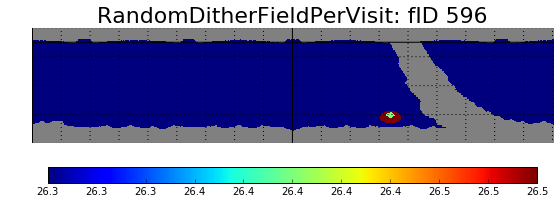

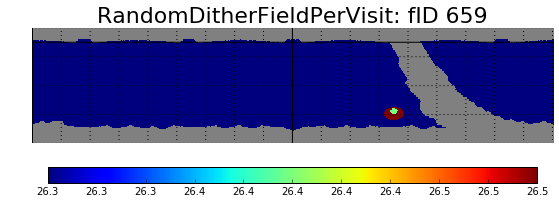

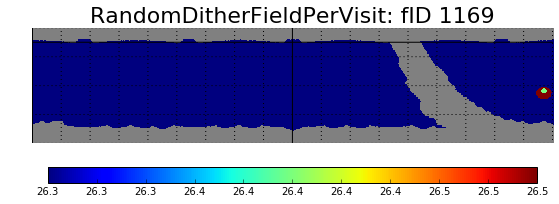

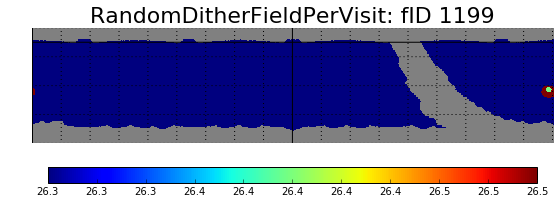

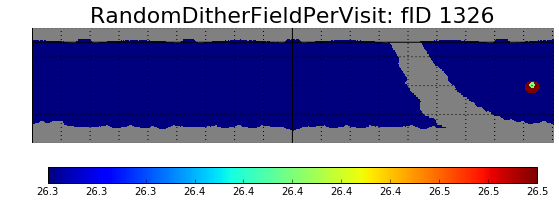

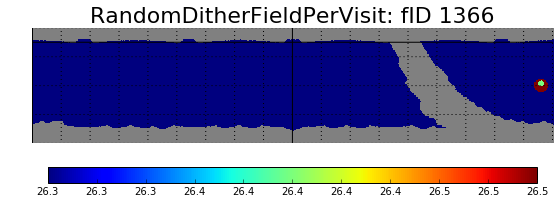

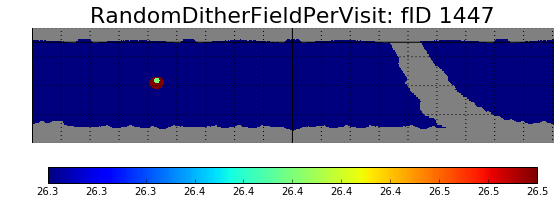

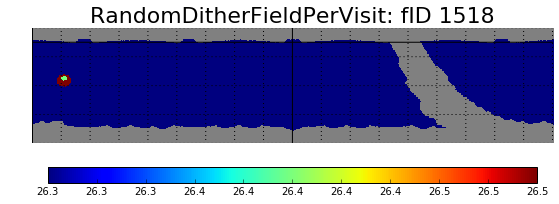

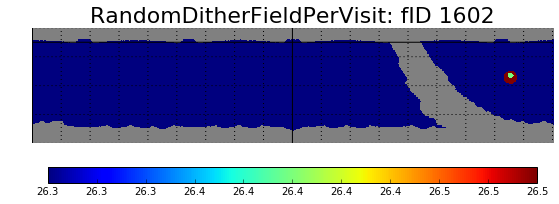

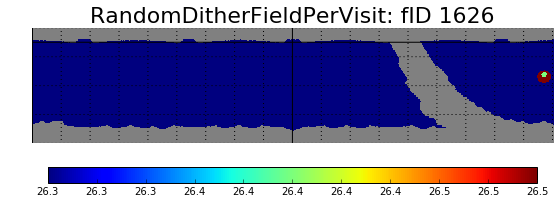

Time taken (s): 230.917479038


In [4]:
startTime= time.time()
dbpath = path+'minion_1016_sqlite.db'
output= findDC1Regions(coaddBundle, dbpath, plotTestPlots= False,
                       depthDiffThreshold= 0.005, rangeThreshold= 0.3,
                       filterBand= 'r', returnAll= True)

focusDither, output, simdata, pixels_in_FOV, pixelNum= output

print 'Time taken (s):', time.time()-startTime

In [5]:
pd.DataFrame([output['disc']['goodFiducialIDs'], output['disc']['diffMedianRegionSurvey'],
             output['disc']['rangeInDepth'], 
              output['disc']['fiducialRA'], output['disc']['fiducialDec'], output['disc']['fiducialGalacticLat'],
             output['disc']['contigIDs']], 
             ['goodFiducialIDs', 'diffMedianRegionSurvey', 'rangeInDepth', 'fiducialRA' , 'fiducialDec', 
             'fiducialGalacticLat', 'contigIDs'])

,0,1,2,3,4,5,6,7,8,9
goodFiducialIDs,596,659,1169,1199,1326,1366,1447,1518,1602,1626
diffMedianRegionSurvey,0.00274674,0.000888207,0.000853014,0.00316667,0.000176563,0.00253947,0.00324798,0.00119596,0.00258571,0.00302116
rangeInDepth,0.295086,0.295115,0.276909,0.242976,0.2307,0.252358,0.298936,0.275177,0.262851,0.265326
fiducialRA,5.10907,5.06507,3.2588,3.20047,3.40151,3.2937,1.64132,2.7582,3.66205,3.25852
fiducialDec,-0.913063,-0.867682,-0.621207,-0.604931,-0.549425,-0.528696,-0.496321,-0.467889,-0.431475,-0.422903
fiducialGalacticLat,-0.471364,-0.435024,0.471441,0.481063,0.547335,0.56624,-0.34385,0.462747,0.621876,0.668431
contigIDs,"[518, 522, 596]","[579, 596, 659]","[1059, 1099, 1119, 1169]","[1099, 1127, 1169, 1199]","[1209, 1217, 1310, 1326]","[1227, 1282, 1340, 1366]","[1323, 1333, 1431, 1447]","[1395, 1417, 1512, 1518]","[1479, 1495, 1582, 1602, 1612]","[1501, 1535, 1598, 1626]"


In [6]:
focusDither

'RandomDitherFieldPerVisit'

Check to see how f1447 region (currently chosen one) does. Read coadd data for NoDither, SequentialHex and Random dithers.

In [7]:
path= '/Volumes/Transcend/'
path2= '2017-01-11/coaddM5Analysis_nside256_withDustExtinction_14pixelRadiusForMasking_rBand_minion1016_fullSurveyPeriod_directory/'
path3= 'maskedCoaddData/'
os.chdir(path+path2+path3)

# get the saved files
filenames = ['coaddM5Data_masked_r_NoDither.npz',
             'coaddM5Data_masked_r_RandomDitherFieldPerVisit.npz',
            'coaddM5Data_masked_r_SequentialHexDitherPerNight.npz']

bundle= {}
for i in range(len(filenames)):
    mB = metricBundles.createEmptyMetricBundle()
    mB.read(filenames[i])
    dithStrategy= mB.metadata.strip()   # key is assigned to be the same as dithStrategy
    print 'Filename for ' + dithStrategy + ': ', filenames[i]
    print ''

    bundle[dithStrategy]= mB

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Filename for NoDither:  coaddM5Data_masked_r_NoDither.npz

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Filename for RandomDitherFieldPerVisit:  coaddM5Data_masked_r_RandomDitherFieldPerVisit.npz

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Filename for SequentialHexDitherPerNight:  coaddM5Data_masked_r_SequentialHexDitherPerNight.npz



In [8]:
from intermediates import findRegionPixels

In [9]:
def checkDepth(dither, ID, disc= True):
    inSurvey= np.where(bundle[dither].metricValues.mask==False)[0]
    surveyMedianDepth= np.median(bundle[dither].metricValues.data[inSurvey])
    print 'Mean survey depth for %s: %f'% (dither, surveyMedianDepth)
    fiducialRA, fiducialDec, diskPixels= findRegionPixels(ID, simdata, 256, disc, 0.0305)
    typicalDepth= np.median(bundle[dither].metricValues.data[diskPixels])
    print 'Diff depth', abs(typicalDepth-surveyMedianDepth)
    
    print 'Region stats'
    print 'Std: ', np.std(bundle[dither].metricValues.data[diskPixels])
    print 'Mean: ', np.mean(bundle[dither].metricValues.data[diskPixels])
    print 'Range: ', abs(max(bundle[dither].metricValues.data[diskPixels])-min(bundle[dither].metricValues.data[diskPixels]))
    print ''

In [10]:
fID= 1447
checkDepth('NoDither', fID)
checkDepth('RandomDitherFieldPerVisit', fID)
checkDepth('SequentialHexDitherPerNight', fID)

Mean survey depth for NoDither: 26.941664
Diff depth 0.0179907882428
Region stats
Std:  0.171892623817
Mean:  26.9890626681
Range:  0.728321454257

Mean survey depth for RandomDitherFieldPerVisit: 27.007376
Diff depth 0.00324797858683
Region stats
Std:  0.049973095069
Mean:  27.003955634
Range:  0.29893617755

Mean survey depth for SequentialHexDitherPerNight: 27.008246
Diff depth 0.011683125246
Region stats
Std:  0.0583554335283
Mean:  27.0081603677
Range:  0.403502732117



In [11]:
from plotFunctions import buildAndPlotRegion

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
FID List for RandomDitherFieldPerVisit: [1212, 1220, 1234, 1305, 1323, 1333, 1365, 1413, 1431, 1447, 1464, 1506, 1542, 1564, 1568]

## Grey (masked) pixel was inputted in the query_ function.


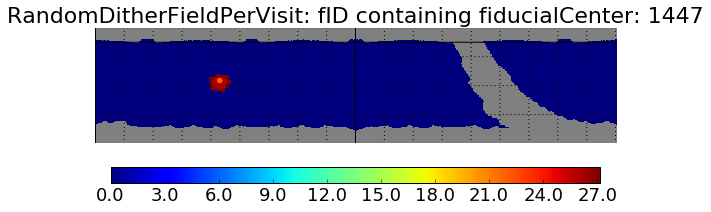

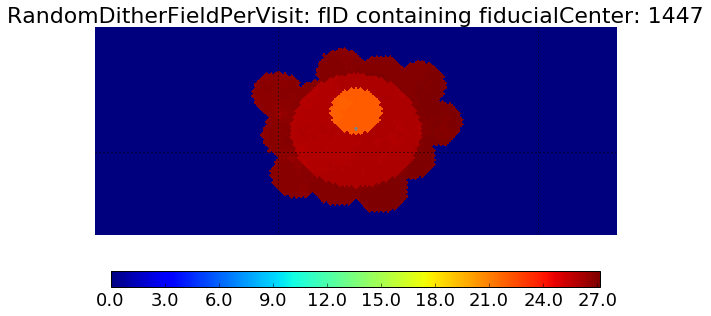

In [12]:
buildAndPlotRegion(fID, simdata, coaddBundle, 0.0305, pixels_in_FOV,
                       focusDither= 'RandomDitherFieldPerVisit', nside= 256, disc= True,)

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
FID List for RandomDitherFieldPerVisit: [1212, 1220, 1234, 1305, 1323, 1333, 1365, 1413, 1431, 1447, 1464, 1542, 1564, 1568]

## Grey (masked) pixel was inputted in the query_ function.


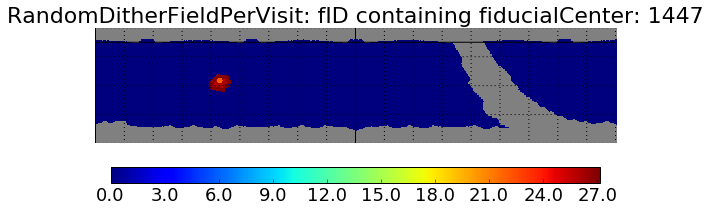

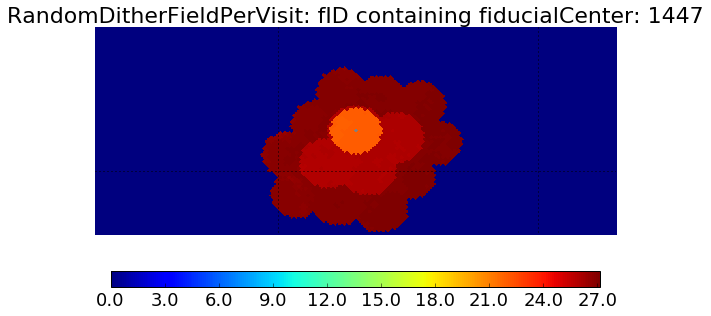

In [13]:
buildAndPlotRegion(fID, simdata, coaddBundle, 0.0305, pixels_in_FOV,
                       focusDither= 'RandomDitherFieldPerVisit', nside= 256, disc= False,)